In [29]:
from graphviz import Digraph

In [30]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._children:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [31]:
class Tensor:
    def __init__(self, data, _children=(), _op='', label='') -> None:
        self.data = data
        self.grad = 0
        
        self._children = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self) -> str:
        return f"Tensor({self.data})"
    
    def __add__(self, right):
        right = right if isinstance(right, Tensor) else Tensor(right)
        out = self.data + right.data
        return Tensor(out, (self, right), '+', label='+')
    
    def __mul__(self, right):
        right = right if isinstance(right, Tensor) else Tensor(right)
        out = self.data * right.data
        return Tensor(out, (self, right), '*', label='*')

In [32]:
a = Tensor(9, label='a')
b = Tensor(2, label='b')
c = Tensor(10, label='c')
d = a*b + c; d.label = 'd'
d

Tensor(28)

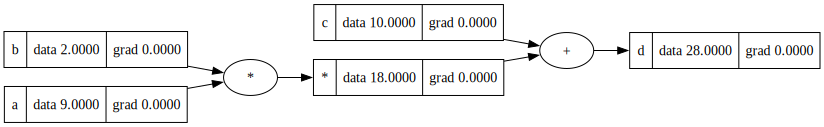

In [33]:
draw_dot(d)

In [34]:
d._children

{Tensor(10), Tensor(18)}